Importing the Libraries

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the collected dataset

In [262]:
data = pd.read_csv('C:/Users/USER/Desktop/Project/Model/modified_data_with_ethylene.csv')
data

,created_at,entry_id,Temperature,Humidity,Ethanol (Gas),Type of Fruit,Ethylene
0,2022-06-11T15:53:46+00:00,1,34.2,81.6,425.0,Banana,217.5
1,2022-06-11T15:54:39+00:00,2,34.3,83.8,425.0,Banana,217.5
2,2022-06-11T15:55:22+00:00,3,34.4,84.6,429.0,Banana,217.1
3,2022-06-11T15:55:55+00:00,4,34.4,85.7,438.0,Banana,216.2
4,2022-06-11T15:56:28+00:00,5,34.5,85.6,424.0,Banana,217.6
...,...,...,...,...,...,...,...
2240,2022-06-29T14:27:19+00:00,2241,34.9,96.4,290.0,Banana,195.0
2241,2022-06-29T14:27:53+00:00,2242,35.1,95.8,292.0,Banana,196.0
2242,2022-06-29T14:28:26+00:00,2243,35.2,95.3,299.0,Banana,199.5
2243,2022-06-29T14:29:00+00:00,2244,35.5,94.8,312.0,Banana,206.0


In [263]:
data["Ethanol (Gas)"].fillna(data['Ethanol (Gas)'].mean(), inplace=True) 
data["Ethylene"].fillna(data['Ethylene'].mean(), inplace=True)

data = pd.get_dummies(data, columns=['Type of Fruit'])

In [264]:
data.rename(columns= {'created_at': 'date'}, inplace=True)
data['date'] = data['date'].apply(lambda x: str(x)[:19])
data['date'] = pd.to_datetime(data['date'])

Classifying the Grades of the fruit

In [265]:
data["Grade"] = [0 for i in range (2245)]

# Grade 1: Unripe
data.loc[(data['Ethylene'] < 100) & (data['Ethanol (Gas)'] < 130), 'Grade'] = 1

# Grade 2: Ripe (perfect to eat)
data.loc[((data['Ethylene'] >= 100) & (data['Ethylene'] < 200)) & ((data['Ethanol (Gas)'] >= 130) & (data['Ethanol (Gas)'] < 210)), 'Grade'] = 2

# Grade 3: Over ripe
data.loc[((data['Ethylene'] >= 200) & (data['Ethylene'] < 300)) & ((data['Ethanol (Gas)'] >= 210) & (data['Ethanol (Gas)'] < 360)), 'Grade'] = 3

# Grade 4: Rotting stage
data.loc[(data['Ethylene'] >= 300) | (data['Ethanol (Gas)'] >= 360), 'Grade'] = 4

Getting the total hours elapsed till date

In [266]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2024, 4, 2, 16, 53, 22, 273475)

In [267]:
data['date'] = pd.to_datetime(data['date'])
data['Hours'] = (today - data['date'])/np.timedelta64(1,'h')

Sorting the hours

In [268]:
lst = list(data['Hours'])
lst.sort()
data.drop('Hours', axis=1, inplace=True)
ser = pd.Series(data = lst, index = data.index)
data['Hours'] = ser
data

,date,entry_id,Temperature,Humidity,Ethanol (Gas),Ethylene,Type of Fruit_Banana,Grade,Hours
0,2022-06-11 15:53:46,1,34.2,81.6,425.0,217.5,True,4,15434.397020
1,2022-06-11 15:54:39,2,34.3,83.8,425.0,217.5,True,4,15434.406187
2,2022-06-11 15:55:22,3,34.4,84.6,429.0,217.1,True,4,15434.415632
3,2022-06-11 15:55:55,4,34.4,85.7,438.0,216.2,True,4,15434.424798
4,2022-06-11 15:56:28,5,34.5,85.6,424.0,217.6,True,4,15434.434243
...,...,...,...,...,...,...,...,...,...
2240,2022-06-29 14:27:19,2241,34.9,96.4,290.0,195.0,True,0,15864.948409
2241,2022-06-29 14:27:53,2242,35.1,95.8,292.0,196.0,True,0,15864.957576
2242,2022-06-29 14:28:26,2243,35.2,95.3,299.0,199.5,True,0,15864.966743
2243,2022-06-29 14:29:00,2244,35.5,94.8,312.0,206.0,True,3,15864.978687


Splitting data to train, test

In [269]:
from sklearn.model_selection import train_test_split

X = data[['Temperature','Ethanol (Gas)', 'Ethylene', 'Grade', 'Humidity']]
y = data['Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [270]:
from sklearn.metrics import r2_score

SVR

In [271]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

In [272]:
# score = svr.score(X_test, y_test)
# print("R-squared:", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_svr)))
r2_score(y_test, pred_svr)

RMSE: 164.344573908364


-0.024487087644277983

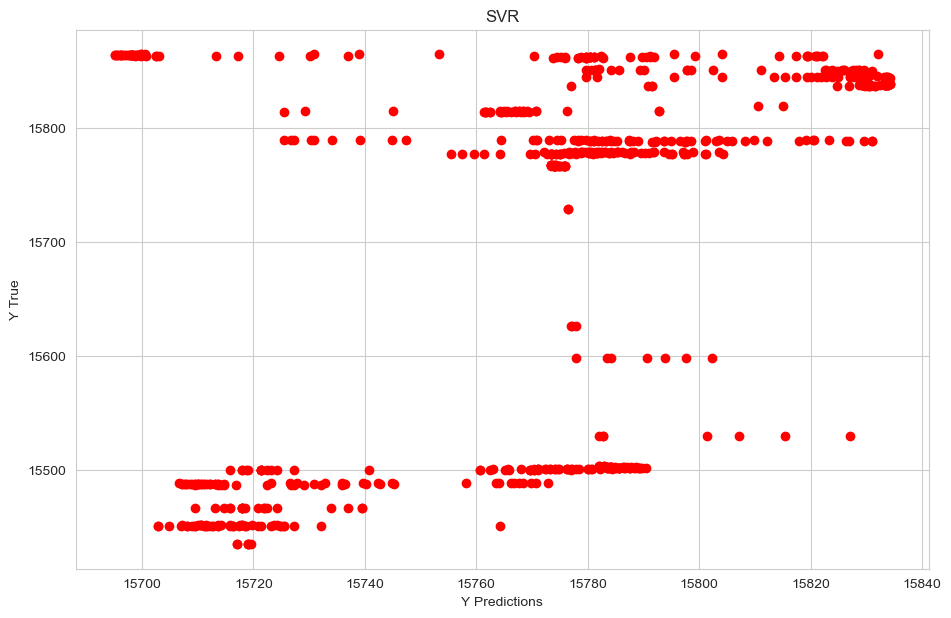

In [273]:
plt.figure(figsize=(11,7))
plt.title('SVR')
sns.set_style('whitegrid')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
plt.scatter(pred_svr, y_test, color='r')

Decision Tree

In [274]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [275]:
score = dtree.score(X_test, y_test)
print("R-squared: ", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_dtree)))
print("R2: ", r2_score(y_test,pred_dtree))

R-squared:  0.9561975427298685
RMSE: 33.9821899039938
R2:  0.9561975427298685


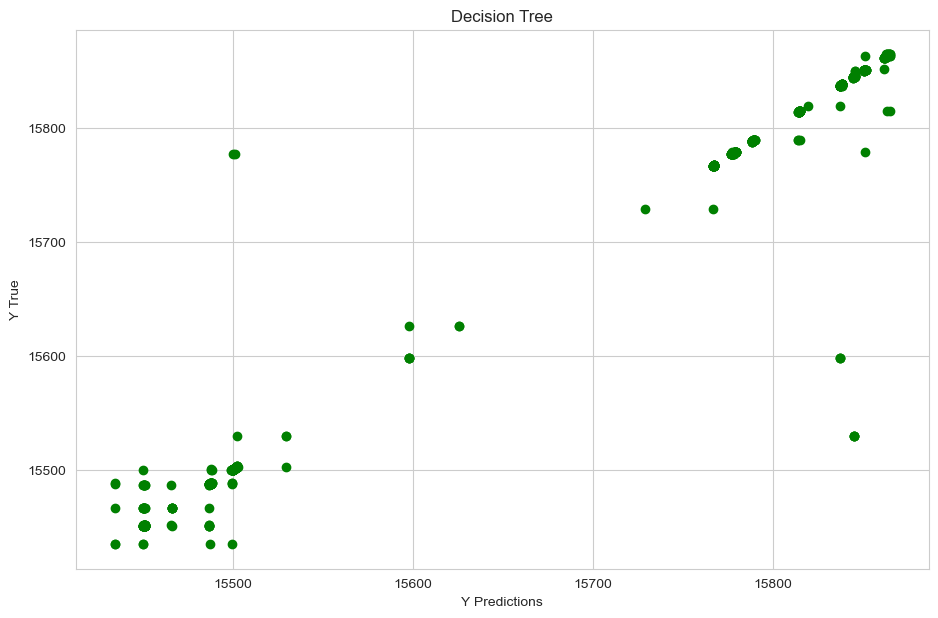

In [276]:
plt.figure(figsize=(11,7))
plt.title('Decision Tree')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_dtree, y_test, color='g')

Random Forest

In [277]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)

In [278]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
r2_score(y_test, pred_rfr)

RMSE: 30.550406391948886


0.9645978422410002

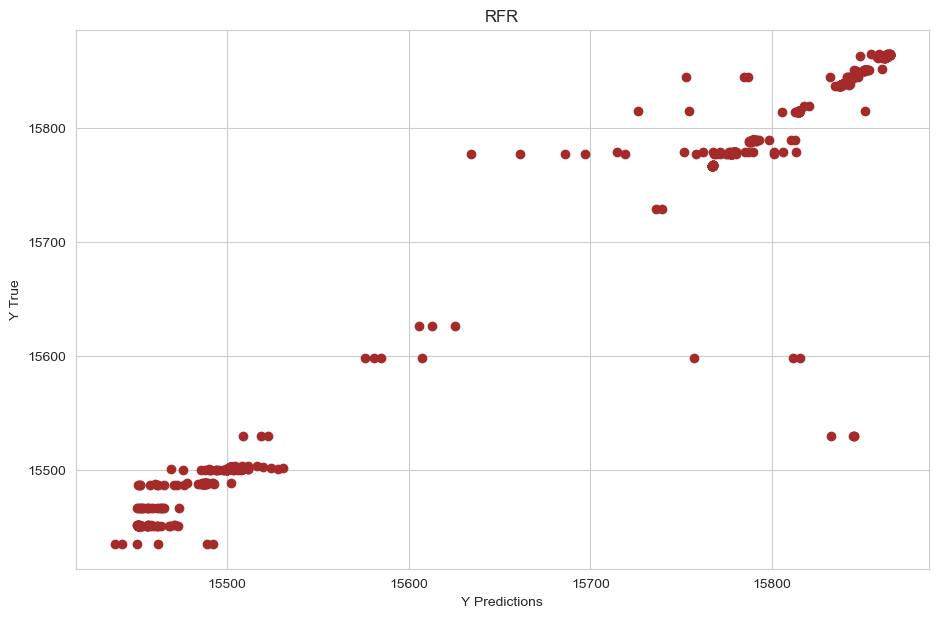

In [279]:
plt.figure(figsize=(11,7))
plt.title('RFR')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_rfr, y_test, color='brown')

Feature Importance

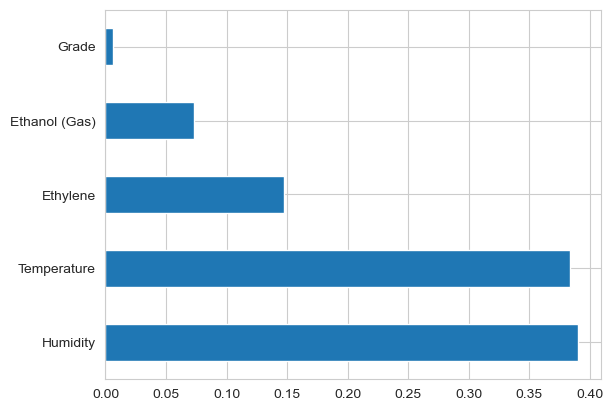

In [280]:
feature_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
